In [2]:
#importing datasets 

import pandas as pd 
import seaborn as sns
import numpy as np 
import datasets 
import matplotlib.pyplot as plt 
import ast

#loading dataset
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)  if pd.notna(x) else x)

In [3]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

Filter for Indian Data Analyst roles  

In [5]:
df_DA = df[(df['job_location'] == 'India') & (df['job_title_short'] == 'Data Analyst')].copy()

In [6]:
df_DA['job_location'].value_counts()

India    2056
Name: job_location, dtype: int64

In [10]:
#extract city names from job_location

df_filtered = df[df['job_location'].notna()]
df_india_locations = df_filtered[df_filtered['job_location'].str.contains('India', na=False)]

df_india_locations['city'] = df_india_locations['job_location'].apply(lambda x: x.split(',')[0].strip()) # type: ignore
city_counts = df_india_locations['city'].value_counts() # type: ignore
city_counts

C:\Users\hp\AppData\Local\Temp\ipykernel_23300\1541872499.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india_locations['city'] = df_india_locations['job_location'].apply(lambda x: x.split(',')[0].strip()) # type: ignore


Bengaluru    11477
India         7660
Hyderabad     6871
Pune          3495
Chennai       2962
             ...  
Kulti            1
Barmer           1
Motihari         1
Sonipat          1
Jaunpur          1
Name: city, Length: 484, dtype: int64

In [11]:
city_counts.head(10)

Bengaluru       11477
India            7660
Hyderabad        6871
Pune             3495
Chennai          2962
Mumbai           2428
Gurugram         2164
New Delhi        1280
Indianapolis     1260
Noida            1073
Name: city, dtype: int64

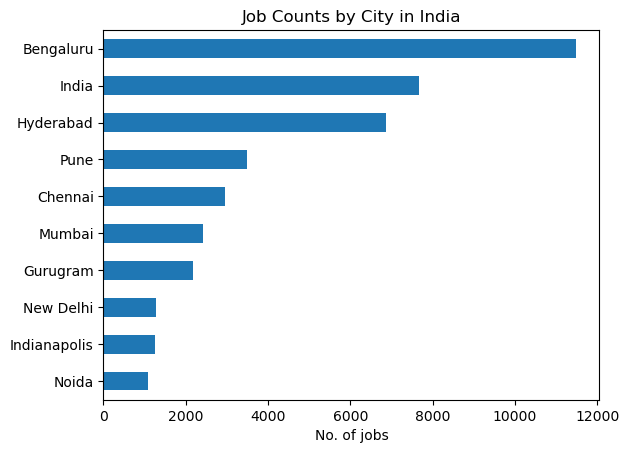

In [12]:

city_counts.head(10).sort_values(ascending=True).plot(kind='barh')
plt.title('Job Counts by City in India')
plt.xlabel('No. of jobs')
plt.ylabel('')
plt.show()

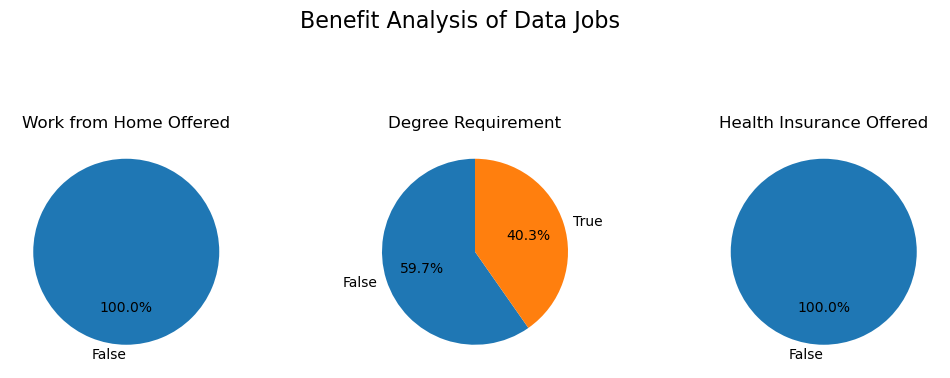

In [17]:

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(nrows=1, ncols=len(dict_column), figsize=(12, 5))
fig.subplots_adjust(wspace=0.5)  # Adjust spacing between subplots

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA[column].value_counts()
    
    # Handle cases with unexpected number of unique values
    if counts.size > 0:  # Check if there are counts to plot
        labels = counts.index.astype(str).tolist()  # Use the actual unique values as labels
        ax[i].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
        ax[i].set_title(title)
    else:
        ax[i].set_title(f'No data for {title}')  # Title for empty data

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()


484965    1072-28 Target India (Non-USA)
122252           20four7va Career Center
690154                             2COMS
109688                             2Coms
312851                              32nd
                       ...              
643017                                ws
560297                  www.razorpay.com
673868                wwwuumenergyOdotin
379504                            yougov
310459                            yougov
Name: company_name, Length: 2056, dtype: object

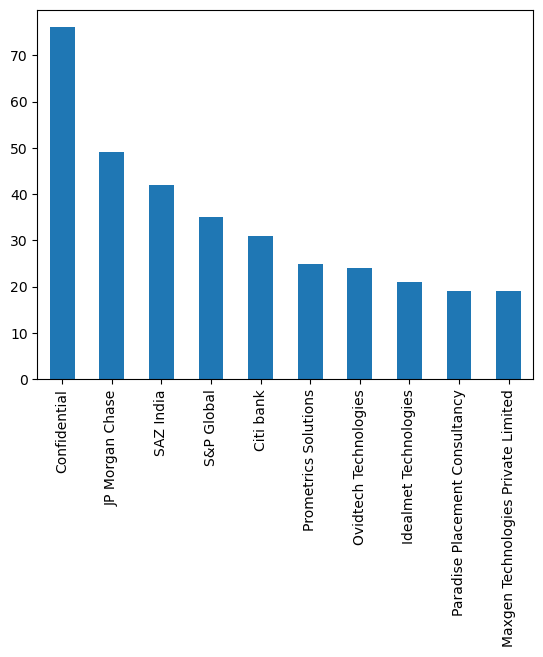

In [18]:

#top 5 companies offering most no. of jobs
df_DA['company_name'].value_counts().head(10).plot(kind='bar')
df_DA['company_name'].sort_values(ascending=True)


In [60]:
#fill salary with median

df_DA['salary_year_avg'] = df_DA['salary_year_avg'].fillna(df['salary_year_avg'].median())

In [62]:
# Count the number of jobs offered by each company
top_companies = df_DA['company_name'].value_counts().head(10).index

# Filter the DataFrame for only the top 10 companies
df_top_companies = df_DA[df_DA['company_name'].isin(top_companies)]

# Group by company and calculate the average salary_year_avg
average_salary = df_top_companies.groupby('company_name')['salary_year_avg'].mean().sort_values(ascending=False)

# Display the results
print(average_salary)

company_name
Citi bank                              115000.0
Confidential                           115000.0
Idealmet Technologies                  115000.0
JP Morgan Chase                        115000.0
Maxgen Technologies Private Limited    115000.0
Ovidtech Technologies                  115000.0
Paradise Placement Consultancy         115000.0
Prometrics Solutions                   115000.0
S&P Global                             115000.0
SAZ India                              115000.0
Name: salary_year_avg, dtype: float64
